# Flight Price Prediction

Submitted by: Sindhu Shree N
    
Batch Number: 1832

The main goal of this project is to build a good model to predict the flight price using the given features.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data=pd.read_excel("Data_Train.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [4]:
train_data.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
8394,IndiGo,9/04/2019,Kolkata,Banglore,CCU → BLR,15:30,18:05,2h 35m,non-stop,No info,4174
6392,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:30,19:15,7h 45m,1 stop,No info,15898
2499,Multiple carriers,3/03/2019,Delhi,Cochin,DEL → BOM → COK,08:00,18:50,10h 50m,1 stop,No info,15342
6438,Multiple carriers,9/06/2019,Delhi,Cochin,DEL → BOM → COK,11:40,21:00,9h 20m,1 stop,No info,7005
6233,Jet Airways,21/03/2019,Delhi,Cochin,DEL → BOM → COK,02:15,04:25 22 Mar,26h 10m,1 stop,No info,12719


So our dataset contains both numerical and categorical datatypes.

In [24]:
train_data.shape

(10683, 11)

So the dataset contains 10683 rows and 11 columns.

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


The dataset contains one integer type data and 10 object type data.

In [7]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
#checking the null values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There is only two null values in Destination and Total_Stops columns so we will drop those null values.

In [5]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

So null values are dropped.

In [28]:
train_data.shape

(10682, 11)

Thus one row is reduced on dropping null value row.

let us extract day and month separately from Date_of_Journey feature.

In [6]:
train_data['Journey_day']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day
train_data['Journey_month']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


So we can see two extra columns are added as Journey_day and Journey_month. So we will drop Date_of_Journey column.

In [7]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Now we will make two columns for Dep_Time and Arrival_Time namely hour and minute columns. 

In [8]:
train_data['Dep_hour']=pd.to_datetime(train_data.Dep_Time).dt.hour
train_data['Dep_min']=pd.to_datetime(train_data.Dep_Time).dt.minute
train_data.drop('Dep_Time',axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [9]:
train_data['Arrival_hour']=pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data['Arrival_min']=pd.to_datetime(train_data.Arrival_Time).dt.minute
train_data.drop('Arrival_Time',axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


Let us seperate hour and minutes from 'Duration' feature.

In [10]:
duration_hours=[]
duration_mins=[]
duration=list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m "
        else:
            duration[i]="0h " + duration[i]
            
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))                     
train_data['Duration_hours']=duration_hours
train_data['Duration_mins']=duration_mins

In [11]:
train_data.drop('Duration',axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [15]:
#checking for unique values.
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# Data Visualization:

<AxesSubplot:xlabel='Airline', ylabel='count'>

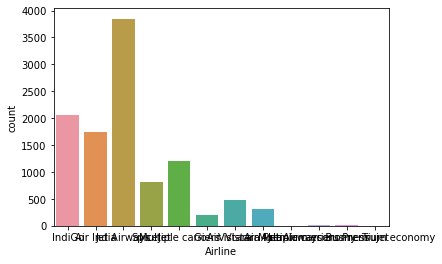

In [17]:
sns.countplot(train_data['Airline'])

The count of AirIndia is more compare to other airlines.

In [18]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

<AxesSubplot:xlabel='Source', ylabel='count'>

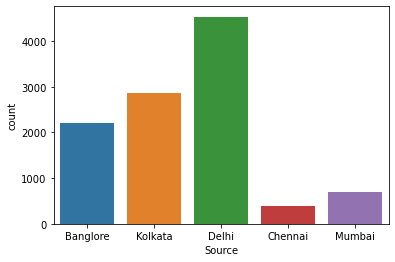

In [19]:
sns.countplot(train_data['Source'])

So most people starts their Journey from Delhi.

<AxesSubplot:xlabel='Destination', ylabel='count'>

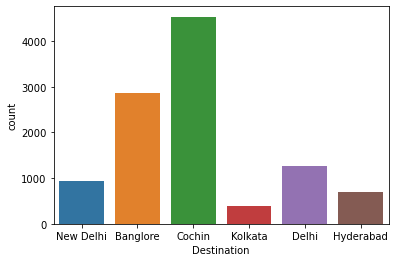

In [20]:
sns.countplot(train_data['Destination'])

In the year 2019 most travellers had travelled for Cochin followed by Bangalore.

<AxesSubplot:xlabel='Route', ylabel='count'>

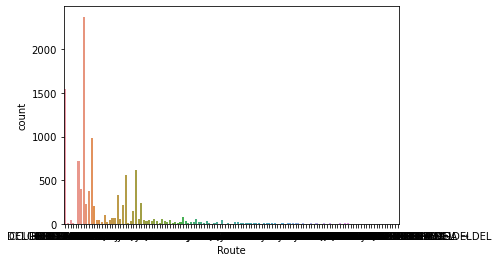

In [21]:
sns.countplot(train_data['Route'])

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

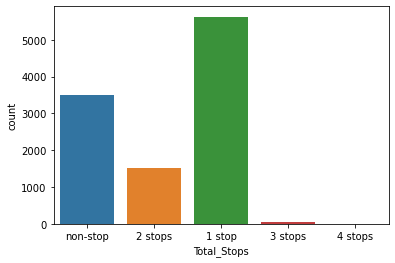

In [24]:
sns.countplot(train_data['Total_Stops'])

So maximum travellers prefer 1 stop travelling followed by non-stop.

<AxesSubplot:xlabel='Price', ylabel='count'>

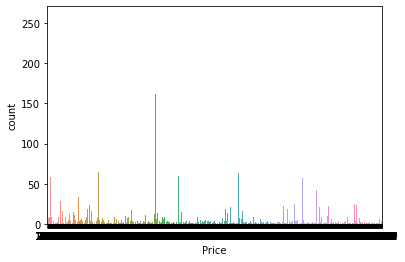

In [25]:
sns.countplot(train_data['Price'])

<AxesSubplot:xlabel='Journey_month', ylabel='count'>

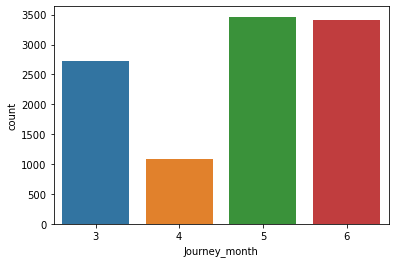

In [26]:
sns.countplot(train_data['Journey_month'])

Most travellers are found in the months may and june.

# Bivariate Analysis:

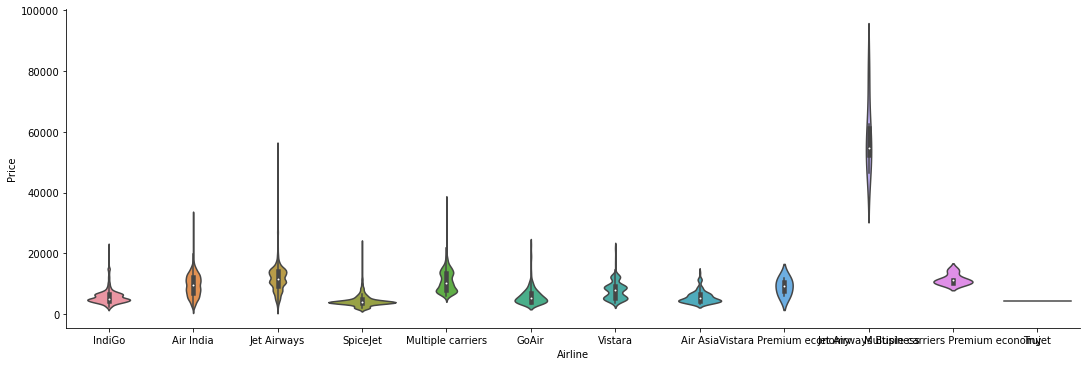

In [54]:
sns.catplot(x='Airline',y="Price",data=train_data,kind='violin',aspect=3)

In [55]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

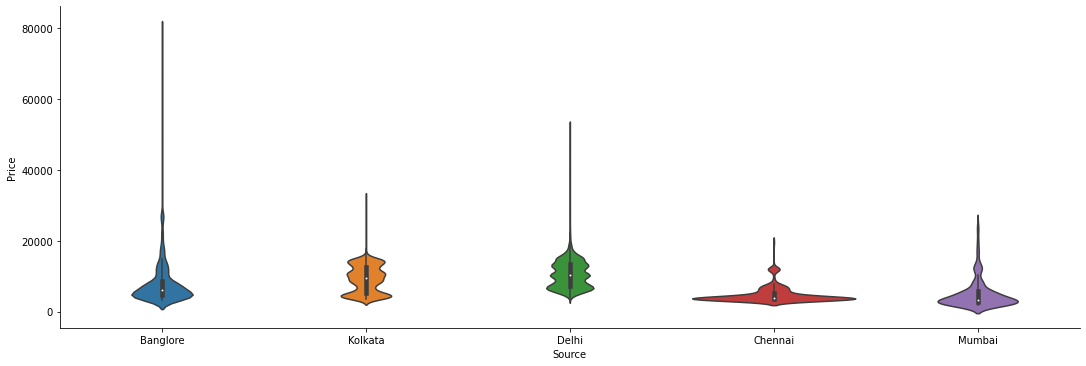

In [56]:
sns.catplot(x='Source',y='Price',data=train_data,kind='violin',aspect=3)

In [57]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

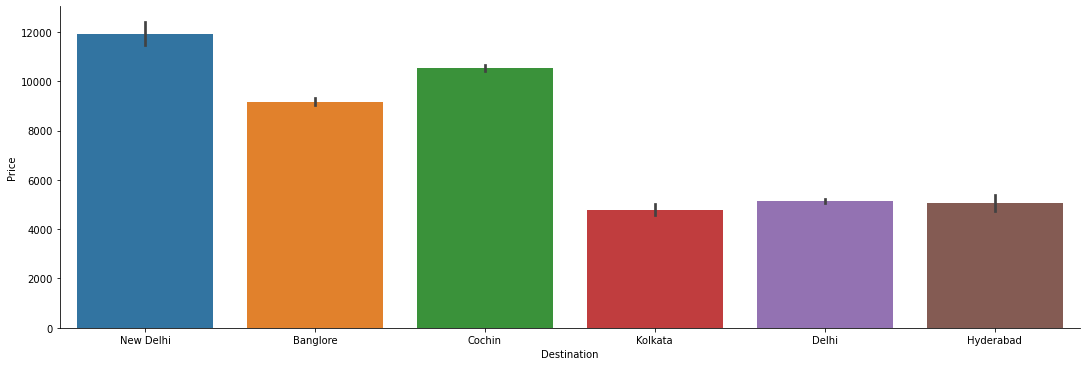

In [59]:
sns.catplot(x='Destination',y='Price',data=train_data,kind='bar',aspect=3)

For destination as NewDelhi maximum price is fixed and followed by Cochin and Bangalore.

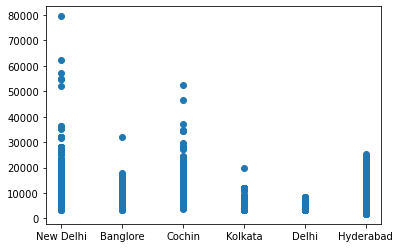

In [27]:
plt.scatter(train_data['Destination'],train_data['Price'])

# Plotting Outliers:

<AxesSubplot:>

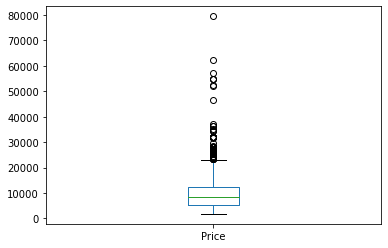

In [12]:
train_data['Price'].plot.box()

# Checking distribution of curves:

<AxesSubplot:xlabel='Price', ylabel='Density'>

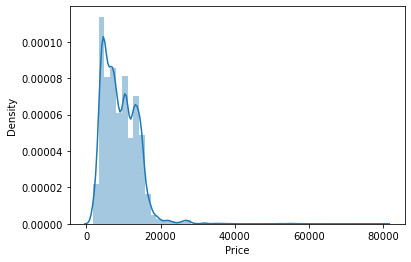

In [13]:
sns.distplot(train_data['Price'])

So we can see the right skewness in the curve.

Removing Outliers:

In [18]:
from scipy.stats import zscore
z=np.abs(zscore(train_data[['Price']]))
z

array([[1.12553455],
       [0.30906781],
       [1.03978296],
       ...,
       [0.40296691],
       [0.77218138],
       [0.57809433]])

In [19]:
threshold=3
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   826,
         936,   946,   959,   975,  1196,  1246,  1341,  1424,  1466,
        1478,  1629,  1654,  1785,  1918,  2055,  2099,  2108,  2495,
        2556,  2618,  2635,  2693,  2924,  3032,  3111,  3257,  3400,
        3535,  3700,  4012,  4521,  4676,  4829,  5013,  5136,  5372,
        5439,  5662,  5701,  5710,  5719,  5738,  5745,  5856,  5986,
        6314,  6407,  6576,  6588,  6605,  6991,  7351,  7356,  7377,
        7537,  7554,  7617,  7713,  7724,  7756,  7902,  8020,  8080,
        8451,  8470,  8536,  8598,  8856,  8940,  8957,  8990,  9019,
        9192,  9238,  9631,  9714,  9973, 10051, 10112, 10159, 10181,
       10188, 10352, 10363, 10382, 10438, 10510], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 

In [20]:
train_data1=train_data[(z<3).all(axis=1)]

In [23]:
print(train_data.shape)
print(train_data1.shape)

(10682, 15)
(10586, 15)


In [25]:
loss_percent=(10682-10586)/10682*100
loss_percent

0.8987081070960493

Since the loss_percent is very less we can proceed.

# Encoding:

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['Airline']=le.fit_transform(train_data['Airline'])

In [27]:
le=LabelEncoder()
train_data['Destination']=le.fit_transform(train_data['Destination'])

In [28]:
le=LabelEncoder()
train_data['Source']=le.fit_transform(train_data['Source'])

In [29]:
le=LabelEncoder()
train_data['Total_Stops']=le.fit_transform(train_data['Total_Stops'])

We have analyzed the dataset so now we are going to drop some features which are not much important to our model.

In [31]:
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,4,3897,24,3,22,20,1,10,2,50
1,1,3,0,1,7662,1,5,5,50,13,15,7,25
2,4,2,1,1,13882,9,6,9,25,4,25,19,0
3,3,3,0,0,6218,12,5,18,5,23,30,5,25
4,3,0,5,0,13302,1,3,16,50,21,35,4,45


Test_set:

In [36]:
test_data=pd.read_excel("Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [40]:
test_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [37]:
test_data.shape

(2671, 10)

So test_data consists of 2671 rows and 10 columns.

In [38]:
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [39]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

So the test_data is clean which means it does not consists any null value.

# Normalising:

In [32]:
#using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(train_data)
scaled

array([[-0.41080484, -1.65835945,  2.41653414, ..., -0.8900139 ,
        -0.97061397,  1.27904078],
       [-1.26115217,  0.89001433, -0.97381203, ..., -0.5870944 ,
        -0.38199906, -0.19631866],
       [ 0.01436882,  0.04055641, -0.2957428 , ...,  0.0187446 ,
         1.03067671, -1.67167809],
       ...,
       [ 0.01436882, -1.65835945,  0.38232644, ..., -0.2841749 ,
        -0.85289099, -1.67167809],
       [ 2.56541078, -1.65835945,  2.41653414, ..., -0.8900139 ,
        -0.97061397,  0.688897  ],
       [-1.26115217,  0.04055641, -0.2957428 , ..., -0.5870944 ,
        -0.26427608, -0.49139054]])

In [33]:
x=train_data.drop('Price',axis=1)
y=train_data['Price']

# Checking and Removing Skewness:

In [34]:
train_data.skew()

Airline           0.731057
Source           -0.424023
Destination       1.244046
Total_Stops       0.631532
Price             1.812405
Journey_day       0.118174
Journey_month    -0.387409
Dep_hour          0.112924
Dep_min           0.167234
Arrival_hour     -0.370146
Arrival_min       0.110945
Duration_hours    0.851197
Duration_mins    -0.090680
dtype: float64

In [35]:
from sklearn.preprocessing import power_transform
power_transform(x,method='yeo-johnson')

array([[-0.29567552, -1.59965221,  1.7526273 , ..., -0.77657798,
        -1.17564313,  1.20041293],
       [-1.4204747 ,  0.90201529, -1.37047751, ..., -0.43301039,
        -0.05525394, -0.09997587],
       [ 0.14759112, -0.01209588,  0.00585891, ...,  0.15684039,
         1.07471547, -1.87792766],
       ...,
       [ 0.14759112, -1.59965221,  0.70701885, ..., -0.12567658,
        -0.85617477, -1.87792766],
       [ 2.12296151, -1.59965221,  1.7526273 , ..., -0.77657798,
        -1.17564313,  0.70428035],
       [-1.4204747 , -0.01209588,  0.00585891, ..., -0.43301039,
         0.0853554 , -0.39116479]])

# Splitting the data:

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

# Using regression models:

# Decision Tree Classifier:

In [37]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)

In [38]:
dt_accuracy = round(dt.score(x_test,y_test)*100,2)
print(dt_accuracy,"%")

72.76 %


In [39]:
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,pred))
print('Mean squared error:', mean_squared_error(y_test,pred))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1328.9633832475433
Mean squared error: 5872537.029177586
Root mean squared error: 2423.331803360321


Though we are getting a accuracy of 73% we are getting lot of errors and also it is not a great accuracy. So let us use other regressors.

# GradientBoostRegressor:

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
#gbr.fit(x_test, y_test)

GradientBoostingRegressor()

In [46]:
y_train_pred = gbr.predict(x_train)
y_test_pred = gbr.predict(x_test)
gbr.score(x_test, y_test)*100

79.43001976315394

In [47]:
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,y_test_pred))
print('Mean squared error:', mean_squared_error(y_test,y_test_pred))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,y_test_pred)))

error:
Mean absolute error: 1484.6552000366746
Mean squared error: 4435310.724537698
Root mean squared error: 2106.017740793676


We can see that the accuracy is more here when compare to decision tree. let us try with the Random Forest 

# Random Forest Regressor:

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(rf.score(x_test,y_test)*100)

78.56573779622134


In [49]:
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,pred))
print('Mean squared error:', mean_squared_error(y_test,pred))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1195.978883199562
Mean squared error: 4621667.689047276
Root mean squared error: 2149.8064305995726


In [50]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.7856573779622134

So we have got our accuracy score and r2_score of 79%.

# Cross validation score:

In [51]:
print(cross_val_score(dt,x,y,cv=5).mean()*100)

68.67916689117952


In [52]:
print(cross_val_score(rf,x,y,cv=5).mean()*100)

80.47381006789418


In [53]:
print(cross_val_score(gbr,x,y,cv=5).mean()*100)

76.17529585463167


Though the accuracy score in gradient boost is more, Random Forest is giving the more cross validation score and is similar to its accuracy. So we will use it for further process.

# Hyper Parameter Tuning:

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
parameters={"bootstrap":[True],
           "n_estimators":[20,30],
           "max_depth":[25,30],
           "max_features":['auto','sqrt'],
           "criterion":['poisson','absolute_error']}
grid=GridSearchCV(estimator=rf, param_grid=parameters,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True],
                         'criterion': ['poisson', 'absolute_error'],
                         'max_depth': [25, 30],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [20, 30]})

In [56]:
best_parameters=grid.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'poisson', 'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 30}


In [63]:
clf=RandomForestRegressor(bootstrap=True,criterion='poisson',max_depth=25,max_features='sqrt',n_estimators=30)
clf.fit(x_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=25, max_features='sqrt',
                      n_estimators=30)

Thus RandomForestRegressor fits to our present model.

# Further Evaluation:

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
Final_mod = RandomForestRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((rf.score(x_test,y_test)*100))

79.09430858421408


# Saving the best model:

In [65]:
import pickle
filename = 'Finalmodel.pkl'
pickle.dump(Final_mod, open(filename,"wb"))
print("Model saved")

Model saved


# Conclusion:

In [66]:
dataframe=pd.DataFrame({})
preds=rf.predict(x_test)
dataframe['Predicted Price']=preds
dataframe['Actual Price']=y_test.values
dataframe

,Predicted Price,Actual Price
0,16821.560000,16655
1,5532.220000,4959
2,8848.940000,9187
3,3690.960000,3858
4,15025.206333,12898
...,...,...
2132,11931.430167,7408
2133,5229.390000,4622
2134,6931.120000,7452
2135,12900.617667,8824


Thus the train and test data are balanced and hit the accuracy of 79%.